# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [3]:
# mostrar las primeras 5 filas de plans
print("=== Plans ===")
display(plans.head())

=== Plans ===


,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [13]:
# mostrar las primeras 5 filas de users
print("\n=== Users ===")
display(users.head())


=== Users ===


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [4]:
# mostrar las primeras 5 filas de usage
print("\n=== Usage ===")
display(usage.head())


=== Usage ===


,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [5]:
# revisar el número de filas y columnas de cada dataset
print("Dimensiones de los datasets:")
print("Plans:", plans.shape)
print("Users:", users.shape)
print("Usage:", usage.shape)

print("\n" + "="*40)


Dimensiones de los datasets:
Plans: (2, 8)
Users: (4000, 8)
Usage: (40000, 6)



In [6]:
# inspección de plans con .info()
print("\n=== INFO: Plans ===")
plans.info()


=== INFO: Plans ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [7]:
# inspección de users con .info()
print("\n=== INFO: Users ===")
users.info()


=== INFO: Users ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [8]:
# inspección de usage con .info()
print("\n=== INFO: Usage ===")
usage.info()


=== INFO: Usage ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [9]:
# cantidad de nulos para users
print("Valores nulos en USERS (conteo):")
print(users.isna().sum())

print("\nProporción de valores nulos en USERS:")
print(users.isna().mean())

print("\n" + "="*40)

Valores nulos en USERS (conteo):
user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64

Proporción de valores nulos en USERS:
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64



In [11]:
# cantidad de nulos para usage
print("Valores nulos en USAGE (conteo):")
print(usage.isna().sum())

print("\nProporción de valores nulos en USAGE:")
print(usage.isna().mean())

Valores nulos en USAGE (conteo):
id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64

Proporción de valores nulos en USAGE:
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [12]:
# explorar columnas numéricas de users
print("Valores únicos - USERS")

for col in users.select_dtypes(include="object").columns:
    print(f"\nColumna: {col}")
    print(users[col].value_counts())

Valores únicos - USERS

Columna: first_name
Carlos     685
Mateo      685
Ana        683
Mariana    661
Luis       645
Sofia      641
Name: first_name, dtype: int64

Columna: last_name
Lopez      835
Garcia     815
Torres     794
Ramirez    778
Gomez      778
Name: last_name, dtype: int64

Columna: city
Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
?            96
Name: city, dtype: int64

Columna: reg_date
2026-05-10 00:00:00.000000000    40
2023-07-16 07:52:04.681170296     1
2024-05-05 09:48:44.831207808     1
2023-07-05 15:34:26.016504128     1
2022-02-02 20:35:49.737434359     1
                                 ..
2024-04-27 17:48:23.225806448     1
2022-03-02 12:19:59.099774944     1
2022-01-20 10:35:11.927981995     1
2023-04-24 21:48:12.423105776     1
2023-12-05 23:41:38.124531136     1
Name: reg_date, Length: 3961, dtype: int64

Columna: plan
Basico     2595
Premium    1405
Name: plan, dtype: int64

Columna: churn_date
1,72238

- La columna user_id representa un identificador único por usuario.
No se observan valores nulos ni duplicados evidentes en esta etapa, y su formato es consistente.
Al ser un identificador, no se utiliza para análisis estadístico, pero es clave para joins entre datasets.
- La columna age contiene valores numéricos correspondientes a la edad de los usuarios.
En esta etapa no se observan valores negativos ni no numéricos.
Será necesario revisar rangos extremos en pasos posteriores para confirmar si existen edades inválidas.

In [13]:
# explorar columnas numéricas de usage
print("Valores únicos - USAGE")

for col in usage.select_dtypes(include="object").columns:
    print(f"\nColumna: {col}")
    print(usage[col].value_counts())

Valores únicos - USAGE

Columna: type
text    22092
call    17908
Name: type, dtype: int64

Columna: date
2024-03-06 21:21:50.882772069    1
2024-03-26 04:39:47.939698492    1
2024-01-13 12:43:15.304882622    1
2024-06-04 00:56:46.405160128    1
2024-06-06 17:01:18.571964298    1
                                ..
2024-02-04 12:05:44.528613215    1
2024-02-03 20:40:26.820670516    1
2024-03-14 03:27:15.430885772    1
2024-03-22 09:45:46.238655966    1
2024-06-04 07:40:46.531163278    1
Name: date, Length: 39950, dtype: int64


- La columna id representa el identificador único de cada evento de uso (llamada o mensaje).
Los valores son únicos, no nulos y consistentes.
Al ser un identificador, no se utiliza para análisis estadístico, pero es clave para trazabilidad de registros.
La columna user_id identifica al usuario asociado a cada evento de uso.
Los valores son numéricos y consistentes con el identificador presente en el dataset users.
Esta columna será utilizada para unir el dataset usage con users.

In [14]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']

for col in columnas_user:
    print(f"\nColumna: {col}")
    print("Frecuencia absoluta:")
    print(users[col].value_counts())
    print("\nFrecuencia relativa:")
    print(users[col].value_counts(normalize=True))



Columna: city
Frecuencia absoluta:
Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
?            96
Name: city, dtype: int64

Frecuencia relativa:
Bogotá      0.228830
CDMX        0.206740
Medellín    0.174455
GDL         0.127443
Cali        0.120079
MTY         0.115265
?           0.027188
Name: city, dtype: float64

Columna: plan
Frecuencia absoluta:
Basico     2595
Premium    1405
Name: plan, dtype: int64

Frecuencia relativa:
Basico     0.64875
Premium    0.35125
Name: plan, dtype: float64


- La variable city muestra una concentración clara de usuarios en Bogotá (22.9%) y CDMX (20.7%), seguidas por Medellín, GDL, Cali y MTY. Esto indica que la base de clientes se concentra principalmente en grandes centros urbanos, lo cual es consistente con un negocio de telecomunicaciones en Latinoamérica.
Sin embargo, se detecta la categoría "?", que representa aproximadamente 2.7% de los registros. Este valor corresponde a un sentinel que indica información de ciudad desconocida o no registrada correctamente. Este valor deberá tratarse en una etapa posterior de limpieza o imputación, ya que puede afectar análisis geográficos y segmentaciones por ciudad.

La columna plan presenta únicamente dos categorías válidas: Basico (64.9%) y Premium (35.1%). No se observan valores inválidos ni sentinels, lo que indica una buena calidad de datos en esta variable.
La distribución muestra que la mayoría de los usuarios están suscritos al plan básico, lo cual sugiere una estrategia comercial enfocada en volumen, mientras que el plan premium representa un segmento relevante pero menor de la base de clientes

In [15]:
# explorar columna categórica de usage
print("Columna: type")
print("Frecuencia absoluta:")
print(usage['type'].value_counts())

print("\nFrecuencia relativa:")
print(usage['type'].value_counts(normalize=True))

Columna: type
Frecuencia absoluta:
text    22092
call    17908
Name: type, dtype: int64

Frecuencia relativa:
text    0.5523
call    0.4477
Name: type, dtype: float64


- Columna: type
Frecuencia absoluta:
text    22092
call    17908
Name: type, dtype: int64

Frecuencia relativa:
text    0.5523
call    0.4477
Name: type, dtype: float64
La columna type ...



---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?

Durante la exploración de los datasets users y usage, se identificaron los siguientes casos de valores inválidos o sentinels:
Columna city (dataset users)
Se detectó el valor "Nan" en 96 registros.
Este valor no representa una ciudad válida y funciona como un sentinel de dato faltante.
Representa aproximadamente 2.7% del total de registros.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [16]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(
    users['reg_date'],
    errors='coerce',
    infer_datetime_format=True
)

In [17]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(
    usage['date'],
    errors='coerce',
    infer_datetime_format=True
)

In [18]:
# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year.value_counts().sort_index()

2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64

En reg_date se observa que la mayoría de los registros se concentran en 2022, 2023 y 2024, lo cual es consistente con el periodo válido del dataset. Sin embargo, aparecen 40 registros en el año 2026, un año futuro respecto al límite esperado (2024), lo que indica errores de captura o de formato que deben revisarse y corregirse o eliminarse antes del análisis.

In [19]:
# Revisar los años presentes en `date` de usage
usage['date'].dt.year.value_counts().sort_index()

2024.0    39950
Name: date, dtype: int64

En la columna date de usage se observa que todos los registros corresponden al año 2024, sin presencia de años fuera de rango ni fechas atípicas. Por lo tanto, basaremos el análisis en estas fechas, ya que son consistentes y válidas para el periodo de estudio.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- Sí. En la columna reg_date del dataset users aparecen 40 registros con año 2026, lo cual es un año futuro respecto al periodo válido de los datos (hasta 2024). Esto sugiere errores de captura, problemas de formato o registros creados con fechas incorrectas.
En contraste, la columna date del dataset usage no presenta años imposibles, ya que todos los registros corresponden al año 2024.

- ¿Qué harías con ellas?
- Para reg_date (users):
Recomendaría revisar y corregir estos registros si existe una fuente confiable para validar la fecha real (por ejemplo, un log del sistema o fecha de creación del usuario). Si no es posible corregirlas, lo más prudente es excluir esos registros del análisis para evitar sesgos en métricas temporales.
Para date (usage):
No se requiere ninguna acción correctiva. Las fechas son consistentes, por lo que pueden utilizarse directamente como base del análisis.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [20]:
# Reemplazar -999 por la mediana de age
median_age = users.loc[users['age'] != -999, 'age'].median()
users['age'] = users['age'].replace(-999, median_age)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [21]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)

# Verificar cambios
users['city'].value_counts(dropna=False)


Bogotá      808
CDMX        730
Medellín    616
NaN         565
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64

In [24]:

# Marcar fechas futuras como NA para reg_date
mask = users['reg_date'].dt.year > 2024
users.loc[mask, 'reg_date'] = pd.NaT

# 3) Verificar cambios
users['reg_date'].dt.year.value_counts(dropna=False).sort_index()


2022.0    1314
2023.0    1316
2024.0    1330
NaN         40
Name: reg_date, dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [25]:
# Verificación MAR en usage (Missing At Random) para duration
duration_nulls_by_type = (
    usage.assign(duration_null=usage['duration'].isna())
         .groupby('type')['duration_null']
         .mean()
)


In [26]:
# Verificación MAR en usage (Missing At Random) para length
length_nulls_by_type = (
    usage.assign(length_null=usage['length'].isna())
         .groupby('type')['length_null']
         .mean()
)

Los valores nulos en las columnas duration y length no aparecen de manera aleatoria en el dataset. Al analizar su relación con la columna type, se observa que la ausencia de estos valores depende del tipo de evento, lo que indica que para ciertos tipos estas métricas no aplican o no se generan por diseño del sistema.
Por esta razón, los nulos se clasifican como MAR (Missing At Random). En consecuencia, no se recomienda imputarlos, ya que hacerlo podría introducir sesgos y distorsionar el análisis. Mantenerlos como valores nulos preserva la coherencia semántica de los datos y refleja correctamente la naturaleza de cada tipo de registro.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [27]:

# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int)  # total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int)  # total de llamadas

# Agrupar información por usuario
usage_agg = (
    usage
    .groupby("user_id")
    .agg(
        cant_mensajes=("is_text", "sum"),
        cant_llamadas=("is_call", "sum"),
        cant_minutos_llamada=("duration", "sum")
    )
    .reset_index()
)

# Observar resultado
usage_agg.head(3)


,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [28]:
# Renombrar columnas
usage_agg = usage_agg.rename(columns={
    'user_id': 'user_id',
    'cant_mensajes': 'cant_mensajes',
    'cant_llamadas': 'cant_llamadas',
    'cant_minutos_llamada': 'cant_minutos_llamada'
})

# Observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [29]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on='user_id', how='left')

# Verificar resultado
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [30]:
# Resumen estadístico de las columnas numéricas
user_profile[
    ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
].describe()


,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.136000,5.524381,4.478120,23.317054
std,17.689919,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,48.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


In [31]:
# Distribución porcentual del tipo de plan
(user_profile['plan']
 .value_counts(normalize=True)
 .mul(100)
 .round(2)
)

Basico     64.88
Premium    35.12
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

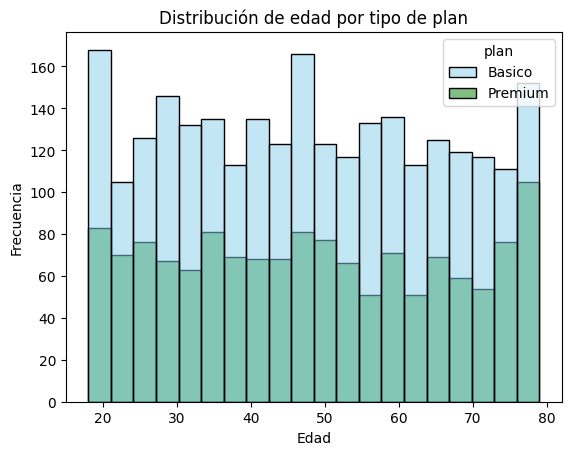

In [45]:
# Histograma para visualizar la edad (age)
sns.histplot(
    data=user_profile,
    x='age',
    hue='plan',
    palette=['skyblue', 'green'],
    bins=20,
    kde=False
)

plt.title('Distribución de edad por tipo de plan')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- Distribución de edad por tipo de plan
Distribución por plan:
Tanto en el plan Básico como en el Premium, la edad de los usuarios se distribuye a lo largo de un rango amplio (aprox. 18 a 80 años), sin que se observe una concentración marcada en un grupo etario específico. No se aprecia una diferencia significativa en la forma de la distribución entre ambos planes.
Comparación entre planes:
El plan Básico presenta una mayor frecuencia absoluta de usuarios en casi todos los rangos de edad, lo cual es consistente con que sea el plan más común. Sin embargo, el plan Premium muestra una distribución similar, lo que sugiere que la edad no es un factor determinante para elegir el tipo de plan.
Forma de la distribución:
La distribución de la edad es aproximadamente uniforme, sin un sesgo claro hacia la izquierda o la derecha. No se identifican picos pronunciados ni valores extremos dominantes.
Conclusión:
No se observa un patrón claro que relacione la edad del usuario con el tipo de plan contratado, por lo que la variable edad, por sí sola, no parece explicar diferencias en la elección del plan.

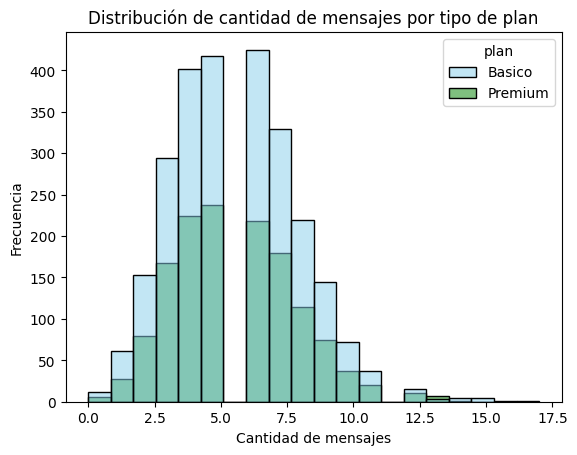

In [46]:
# Histograma para visualizar la cant_mensajes
sns.histplot(
    data=user_profile,
    x='cant_mensajes',
    hue='plan',
    palette=['skyblue', 'green'],
    bins=20,
    kde=False
)

plt.title('Distribución de cantidad de mensajes por tipo de plan')
plt.xlabel('Cantidad de mensajes')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
Distribución de la cantidad de mensajes por tipo de plan
Distribución por plan:
Los usuarios del plan Básico se concentran principalmente en un rango medio de envío de mensajes (aproximadamente entre 3 y 7 mensajes), mientras que el plan Premium presenta una distribución similar, aunque con una mayor presencia relativa en los valores más altos.
Comparación entre planes:
Se observa que los usuarios Premium tienden a enviar ligeramente más mensajes que los usuarios del plan Básico, especialmente en los rangos superiores, lo que sugiere un uso más intensivo del servicio de mensajería.
Forma de la distribución:
La distribución de la cantidad de mensajes es sesgada a la derecha, con la mayoría de los usuarios enviando pocos mensajes y una menor proporción de usuarios con volúmenes altos.
Conclusión:
La cantidad de mensajes enviados parece estar asociada al tipo de plan, siendo el plan Premium el que concentra a los usuarios con mayor actividad de mensajería.

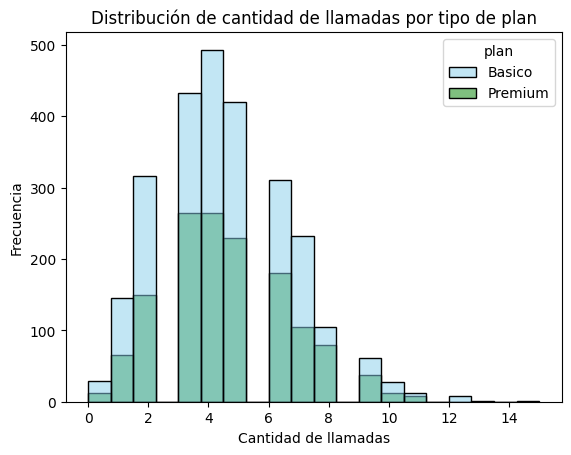

In [47]:
# Histograma para visualizar la cantidad de llamadas
sns.histplot(
    data=user_profile,
    x='cant_llamadas',
    hue='plan',
    palette=['skyblue', 'green'],
    bins=20,
    kde=False
)

plt.title('Distribución de cantidad de llamadas por tipo de plan')
plt.xlabel('Cantidad de llamadas')
plt.ylabel('Frecuencia')
plt.show()



💡Insights: 
Distribución de la cantidad de llamadas por tipo de plan

Distribución por plan:
En ambos planes, la mayoría de los usuarios se concentra en un rango bajo a medio de llamadas (aproximadamente entre 2 y 6 llamadas). Sin embargo, el plan Premium presenta una mayor presencia relativa en los rangos más altos de número de llamadas.
Comparación entre planes:
Los usuarios del plan Premium tienden a realizar más llamadas que los usuarios del plan Básico, especialmente a partir de valores medios y altos, lo que indica un uso más intensivo del servicio de llamadas.
Forma de la distribución:
La distribución de la cantidad de llamadas es sesgada a la derecha, con una cola larga hacia valores altos y pocos usuarios realizando un número elevado de llamadas.
Conclusión:
El número de llamadas parece estar asociado al tipo de plan, siendo el plan Premium el que agrupa a los usuarios con mayor actividad de llamadas.

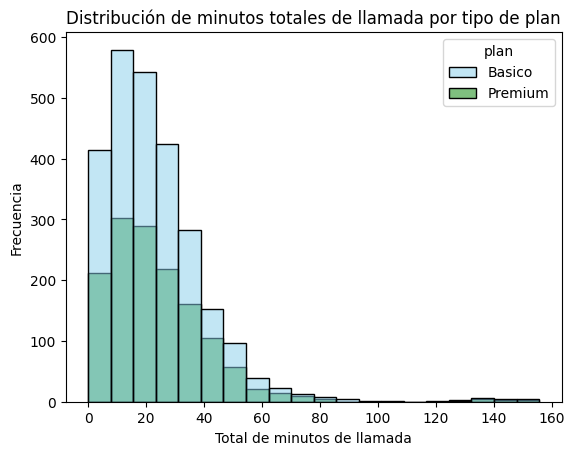

In [48]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(
    data=user_profile,
    x='cant_minutos_llamada',
    hue='plan',
    palette=['skyblue', 'green'],
    bins=20,
    kde=False
)

plt.title('Distribución de minutos totales de llamada por tipo de plan')
plt.xlabel('Total de minutos de llamada')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
Distribución de minutos totales de llamada por tipo de plan

Distribución por plan:
En ambos planes, la mayoría de los usuarios se concentra en valores bajos a medios de minutos totales de llamada (aproximadamente entre 0 y 40 minutos). Sin embargo, el plan Premium presenta una mayor proporción relativa de usuarios con tiempos de llamada más elevados.
Comparación entre planes:
Los usuarios del plan Premium tienden a acumular más minutos totales de llamada que los usuarios del plan Básico, especialmente en los rangos altos, lo que refleja un uso más intensivo del servicio de llamadas.
Forma de la distribución:
La distribución de los minutos totales de llamada es fuertemente sesgada a la derecha, con una cola larga que indica la presencia de usuarios con consumos muy altos (posibles outliers).
Conclusión:
El total de minutos de llamada es una variable que diferencia claramente el comportamiento entre planes, siendo el plan Premium el que concentra a los usuarios con mayor consumo de tiempo en llamadas.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

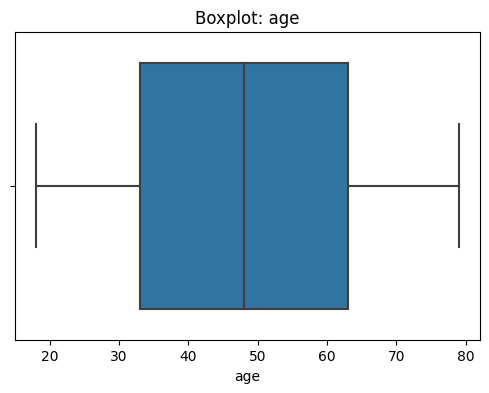

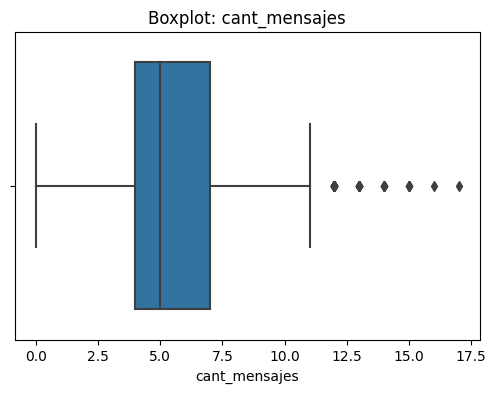

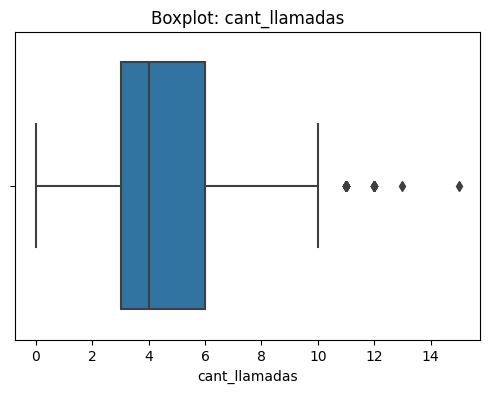

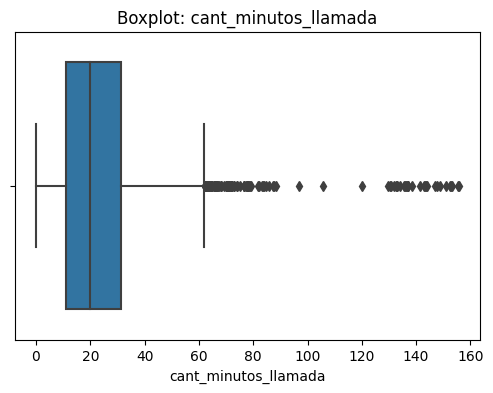

In [49]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=user_profile, x=col)
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)
    plt.show()

💡Insights: 
Age: No presenta outliers relevantes. Los valores de edad se encuentran dentro de rangos razonables y esperados para usuarios reales.

cant_mensajes: Presenta outliers en el extremo superior de la distribución. Estos corresponden a usuarios que envían una cantidad significativamente mayor de mensajes en comparación con el resto.

cant_llamadas: Se observan outliers del lado derecho de la distribución, asociados a usuarios con un número elevado de llamadas.

cant_minutos_llamada: Presenta outliers claros en el extremo superior, con algunos usuarios acumulando un número muy alto de minutos de llamada.

In [32]:

# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_superior = Q3 + 1.5 * IQR

    print(f'{col}')
    print(f'  Límite superior (IQR): {limite_superior:.2f}')
    print(f'  Número de outliers: {(user_profile[col] > limite_superior).sum()}')
    print('-' * 40)




cant_mensajes
  Límite superior (IQR): 11.50
  Número de outliers: 46
----------------------------------------
cant_llamadas
  Límite superior (IQR): 10.50
  Número de outliers: 30
----------------------------------------
cant_minutos_llamada
  Límite superior (IQR): 61.86
  Número de outliers: 109
----------------------------------------


In [33]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights: 
- cant_mensajes: mantener o no outliers, porqué?
  Se decidió mantener los outliers, ya que aunque superan el límite superior calculado con IQR, los valores máximos siguen siendo razonables y representan usuarios que envían muchos mensajes de forma real. No parecen errores de captura.
  
- cant_llamadas: mantener o no outliers, porqué?
  Los outliers en la cantidad de llamadas se mantienen, porque corresponden a usuarios con un uso más intensivo del servicio. Los valores observados no son extremos irreales y forman parte del comportamiento esperado de algunos usuarios.

  
- cant_minutos_llamada: mantener o no outliers, porqué?
  A pesar de que esta variable presenta los outliers más altos, también se decidió conservarlos, ya que reflejan usuarios que pasan mucho tiempo en llamadas. Eliminarlos podría distorsionar el análisis y ocultar patrones importantes de consumo.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [34]:
# Crear columna grupo_uso
user_profile['grupo_uso'] = 'Alto uso'

user_profile.loc[
    (user_profile['cant_llamadas'] < 5) & (user_profile['cant_mensajes'] < 5),
    'grupo_uso'
] = 'Bajo uso'

user_profile.loc[
    (user_profile['cant_llamadas'] < 10) & (user_profile['cant_mensajes'] < 10),
    'grupo_uso'
] = 'Uso medio'


In [35]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Uso medio


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [36]:
# Crear columna grupo_edad
user_profile['grupo_edad'] = 'Adulto Mayor'

# Joven: age < 30
user_profile.loc[user_profile['age'] < 30, 'grupo_edad'] = 'Joven'

# Adulto: age < 60
user_profile.loc[
    (user_profile['age'] >= 30) & (user_profile['age'] < 60),
    'grupo_edad'
] = 'Adulto'

In [37]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Uso medio,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

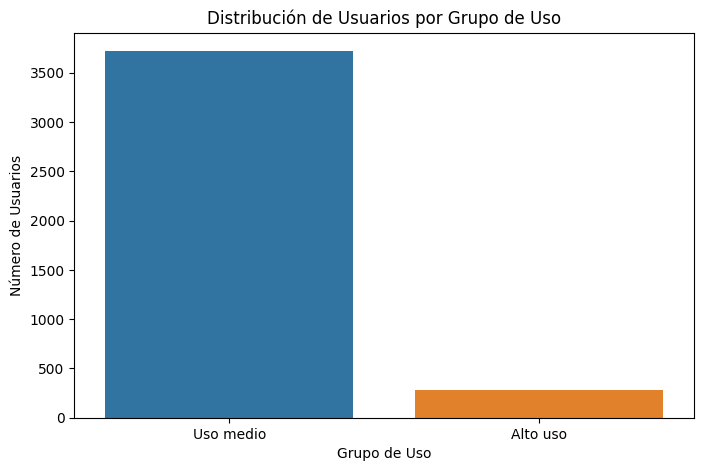

In [38]:
# Visualización de los segmentos por uso
plt.figure(figsize=(8, 5))
sns.countplot(
    data=user_profile,
    x='grupo_uso',
    order=user_profile['grupo_uso'].value_counts().index
)

plt.title('Distribución de Usuarios por Grupo de Uso')
plt.xlabel('Grupo de Uso')
plt.ylabel('Número de Usuarios')

plt.show()

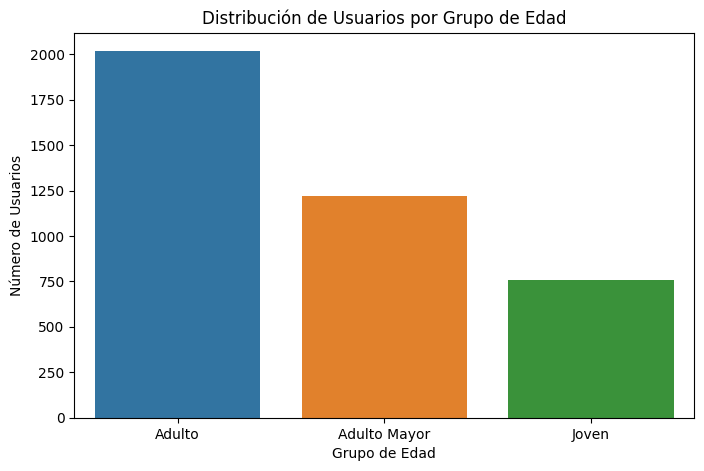

In [39]:
# Visualización de los segmentos por edad
plt.figure(figsize=(8, 5))
sns.countplot(
    data=user_profile,
    x='grupo_edad',
    order=user_profile['grupo_edad'].value_counts().index
)

plt.title('Distribución de Usuarios por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Usuarios')

plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
Durante la etapa de limpieza se identificaron registros con fechas de registro futuras, lo cual corresponde a errores de captura o de sistema en la columna reg_date.
En total, 40 registros de un total de 4,000 usuarios, equivalentes al 1.0% del dataset, presentaban este problema. Estas observaciones fueron marcadas como valores nulos para evitar distorsiones en los análisis temporales.

Asimismo, se detectaron patrones de uso extremo en variables como el número de llamadas, los cuales fueron tratados como outliers para prevenir sesgos en las métricas de comportamiento promedio.


🔍 **Segmentos por Edad**
La segmentación por edad permitió identificar tres grupos claramente diferenciados:

Adultos: 2,018 usuarios (50.45%)

Adultos Mayores: 1,222 usuarios (30.55%)

Jóvenes: 760 usuarios (19.00%)

El segmento Adulto representa más de la mitad de la base de clientes, lo que indica que ConnectaTel tiene una fuerte presencia en usuarios en edad laboral activa, un grupo clave por su estabilidad y potencial de consumo continuo. El segmento de Adultos Mayores también tiene un peso relevante, lo que abre oportunidades para planes más sencillos y de uso controlado.


📊 **Segmentos por Nivel de Uso**
En términos de comportamiento de uso, se observó una distribución altamente concentrada:

Uso medio: 3,721 usuarios (93.02%)

Alto uso: 279 usuarios (6.98%)

Esto sugiere que la gran mayoría de los clientes utiliza el servicio de manera moderada, mientras que un grupo reducido de usuarios concentra el consumo intensivo, lo cual puede tener un impacto desproporcionado en los ingresos y en los costos operativos.

💡 **Recomendaciones**

Diseñar planes enfocados en el uso medio, ya que este segmento representa más del 90% de los clientes y constituye la base del negocio.
Crear planes premium específicos para el 6.98% de usuarios de alto uso, maximizando ingresos y controlando costos.
Desarrollar ofertas diferenciadas por edad, con planes simples y de fácil comprensión para adultos mayores y opciones más flexibles para adultos jóvenes.
Dar seguimiento a los usuarios con uso extremo, diferenciando entre clientes estratégicos y posibles anomalías.
Mejorar los mecanismos de validación de datos, especialmente en fechas de registro, para reducir errores futuros.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`